# **Project: BBI (Bear, Bird, Insect) Project**

**This project was done to put the learned knowledge into practice.**

In [ ]:
# Importing the necessary libraries: `torch` and `fastai`.
import torch
import fastai
from fastai.vision.all import *
from pathlib import Path
from ipywidgets import widgets

print(torch.__version__) # Printing the version of the `torch` library.
print(fastai.__version__) # Printing the version of the `fastai` library.

2.0.1+cu118
2.7.12


In [ ]:
# Cloning the OIDv4 Toolkit repository from GitHub using Git.
# !git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
# Changing the directory to 'OIDv4_ToolKit' and installing the required dependencies.
# !cd OIDv4_ToolKit && pip install -r requirements.txt  

In [ ]:
# Changing the directory to 'OIDv4_ToolKit' and running the 'main.py' script with the '-h' flag to display the help information.
# !cd OIDv4_ToolKit && python main.py -h

In [ ]:
# Changing the directory to 'OIDv4_ToolKit' and running the 'main.py' script with specific arguments to initiate the dataset downloading process.
# !cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Bear Insect Bird --type_csv train --limit 200

In [ ]:
# Defining the 'path' variable to represent the 'train' directory or path.
path = Path('train')

# soon...
getImageFiles = get_image_files(path)

# Calling the 'verify_images' function with the provided 'path' and storing the result in the 'verification_result' variable.
verificationResults = verify_images(path)

'PosixPath' object is not iterable


In [ ]:
# Defining a DataBlock for processing images of foods.
foods = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)


# Creating dataloaders from the defined DataBlock for the given 'path'.
dls = foods.dataloaders(path)

# Displaying a batch of images from the training dataloader.
#dls.train.show_batch(max_n=32, nrows=4)

# Creating a convolutional neural network (CNN) learner using the specified dataloaders (`dls`), the ResNet34 architecture (`resnet34`), and accuracy as the evaluation metric.
learn = cnn_learner(dls, resnet34, metrics=accuracy)
# Fine-tuning the pre-trained model for 7 epochs.
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.429326,0.302607,0.891667,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.279115,0.267934,0.908333,00:14
1,0.201526,0.186766,0.925000,00:14
2,0.168981,0.172022,0.925000,00:14


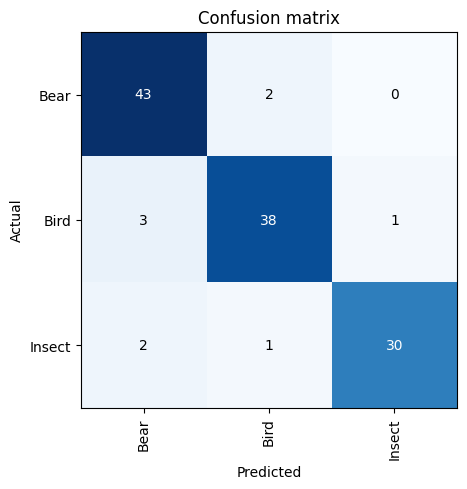

In [ ]:
# Creating a ClassificationInterpretation object from the learner ('learn').
class_inter = ClassificationInterpretation.from_learner(learn)

# Using the ClassificationInterpretation object to plot a confusion matrix.
class_inter.plot_confusion_matrix()

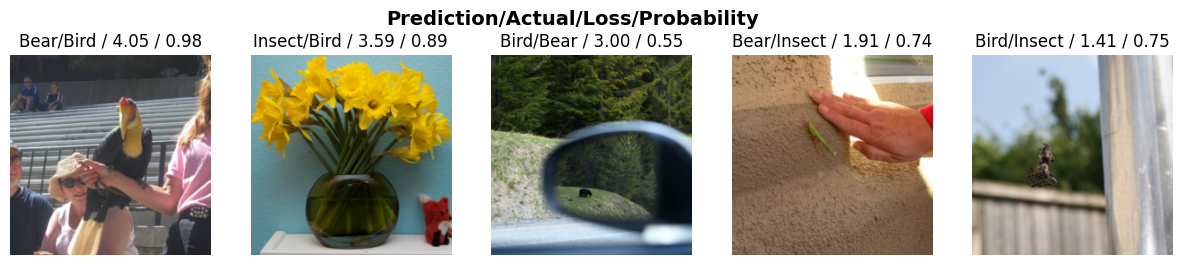

In [ ]:
# Plotting the top loss examples from the ClassificationInterpretation object.
class_inter.plot_top_losses(5, nrows=1)

In [ ]:
# Creating a file upload widget using the `FileUpload` class from the `widgets` module.
upload = widgets.FileUpload()

# The file upload widget allows users to upload files from their local machine.
upload

FileUpload(value={}, description='Upload')

Predicted: Bird
Probability: 100.0%


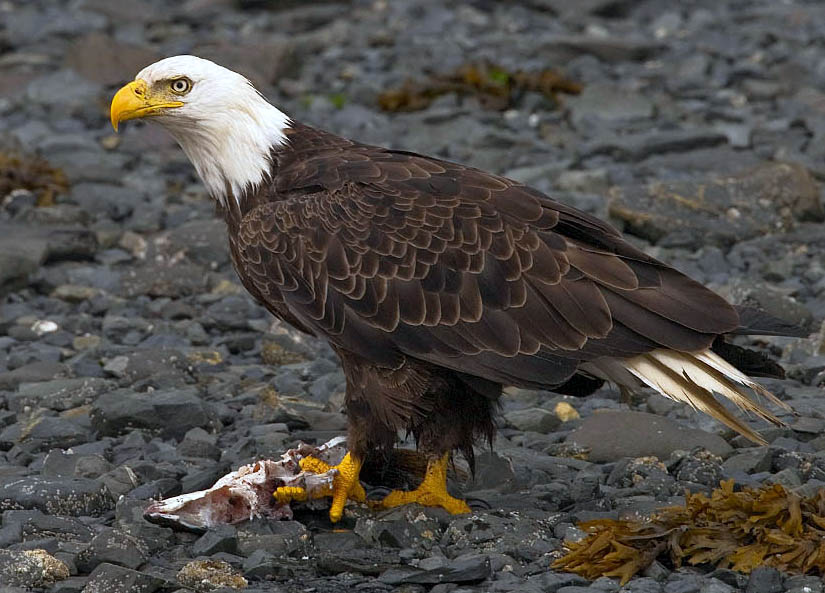

In [ ]:
# Creating a PILImage object from the uploaded image data.
img = PILImage.create(upload.data[-1])

# Using the 'learn' learner to predict the class label, prediction ID, and probabilities for the given image.
pred, pred_id, probs = learn.predict(img)

# Printing the predicted class label and the corresponding probability.
print(f'Predicted: {pred}')
print(f'Probability: {probs[pred_id]*100:.1f}%')

# Displaying the image.
img

In [ ]:
# Exporting the trained model ('learn') to a pickle file named 'bbi_model.pkl'.
learn.export('bbi_model.pkl')